# Introduction to the finite element method  <a class="tocSkip">
    

## Lecture 2: Introduction to the finite element method and implementation in 1D <a class="tocSkip">

## Lecture Plan <span class="tocSkip">

### This lecture:  <span class="tocSkip">
* Projecting rather than interpolating a function
* Solving boundary value problems (ODEs) using the FEM
* Developing a general FEM solver in 1D using *assembly*

Note that there is quite a lot of material covered in this lecture, but don't worry if we don't get through all of it in the time available as the next lectures will make use of dedicated libraries and not make direct use of this material.

### The following lectures:  <span class="tocSkip">
3. Solving more complicated problems in higher dimensions using Firedrake
4. Ocean modelling with Thetis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#$L^2$-projection-of-a-function" data-toc-modified-id="$L^2$-projection-of-a-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>$L^2$ projection of a function</a></span><ul class="toc-item"><li><span><a href="#Theory" data-toc-modified-id="Theory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Theory</a></span></li><li><span><a href="#Link-to-the-finite-element-method" data-toc-modified-id="Link-to-the-finite-element-method-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Link to the finite element method</a></span></li><li><span><a href="#Implementation---the-mass-matrix" data-toc-modified-id="Implementation---the-mass-matrix-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Implementation - the mass matrix</a></span></li><li><span><a href="#Implementation-in-code" data-toc-modified-id="Implementation-in-code-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Implementation in code</a></span></li><li><span><a href="#Quadrature---Simpson's-rule" data-toc-modified-id="Quadrature---Simpson's-rule-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Quadrature - Simpson's rule</a></span><ul class="toc-item"><li><span><a href="#The-composite-version-of-Simpson's-Rule" data-toc-modified-id="The-composite-version-of-Simpson's-Rule-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>The composite version of Simpson's Rule</a></span></li><li><span><a href="#Application-of-Simpson's-rule" data-toc-modified-id="Application-of-Simpson's-rule-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Application of Simpson's rule</a></span></li></ul></li><li><span><a href="#Approximation-using-a-continuous-function" data-toc-modified-id="Approximation-using-a-continuous-function-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Approximation using a continuous function</a></span></li><li><span><a href="#Quality-of-approximation" data-toc-modified-id="Quality-of-approximation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Quality of approximation</a></span></li><li><span><a href="#RMS-(root-mean-square)-vs-$L^2$-norm" data-toc-modified-id="RMS-(root-mean-square)-vs-$L^2$-norm-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>RMS (root mean square) vs $L^2$ norm</a></span></li></ul></li><li><span><a href="#Solving-boundary-value-problems-(BVPs)-using-the-FEM" data-toc-modified-id="Solving-boundary-value-problems-(BVPs)-using-the-FEM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Solving boundary value problems (BVPs) using the FEM</a></span><ul class="toc-item"><li><span><a href="#The-fundamental-form-of-the-discretisation-ignoring-BCs" data-toc-modified-id="The-fundamental-form-of-the-discretisation-ignoring-BCs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The fundamental form of the discretisation ignoring BCs</a></span><ul class="toc-item"><li><span><a href="#Weak-or-variational-form-of-problem" data-toc-modified-id="Weak-or-variational-form-of-problem-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Weak or variational form of problem</a></span></li><li><span><a href="#Discretisation-by-restricting-the-function-space-to-be-finite-dimensional" data-toc-modified-id="Discretisation-by-restricting-the-function-space-to-be-finite-dimensional-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Discretisation by restricting the function space to be finite dimensional</a></span></li><li><span><a href="#Choice-of-basis-functions-(aka-choice-of-function-space-aka-choice-of-&quot;finite-element&quot;)" data-toc-modified-id="Choice-of-basis-functions-(aka-choice-of-function-space-aka-choice-of-&quot;finite-element&quot;)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Choice of basis functions (aka choice of function space aka choice of "finite element")</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Finite element approximation</a></span></li><li><span><a href="#Terminology" data-toc-modified-id="Terminology-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Terminology</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#A-simple-problem-with-homogeneous-Dirichlet-BCs" data-toc-modified-id="A-simple-problem-with-homogeneous-Dirichlet-BCs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A simple problem with homogeneous Dirichlet BCs</a></span><ul class="toc-item"><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Finite-element-approximation" data-toc-modified-id="Finite-element-approximation-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Finite element approximation</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#An-example-with-a-more-complex-RHS-with-homogeneous-Dirichlet-BCs" data-toc-modified-id="An-example-with-a-more-complex-RHS-with-homogeneous-Dirichlet-BCs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>An example with a more complex RHS with homogeneous Dirichlet BCs</a></span><ul class="toc-item"><li><span><a href="#A-convergence-analysis" data-toc-modified-id="A-convergence-analysis-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>A convergence analysis</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Final-comments" data-toc-modified-id="Final-comments-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Final comments</a></span></li></ul></li><li><span><a href="#Implementation-of-the-FEM" data-toc-modified-id="Implementation-of-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementation of the FEM</a></span><ul class="toc-item"><li><span><a href="#Local-assembly-over-elements" data-toc-modified-id="Local-assembly-over-elements-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Local assembly over elements</a></span><ul class="toc-item"><li><span><a href="#The-underlying-idea" data-toc-modified-id="The-underlying-idea-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>The underlying idea</a></span></li><li><span><a href="#Local-assembly-for-the-mass-matrix" data-toc-modified-id="Local-assembly-for-the-mass-matrix-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Local assembly for the mass matrix</a></span></li><li><span><a href="#Example---projection" data-toc-modified-id="Example---projection-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Example - projection</a></span></li><li><span><a href="#Unstructured-mesh-data-structures-(the-connectivity-matrix)" data-toc-modified-id="Unstructured-mesh-data-structures-(the-connectivity-matrix)-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Unstructured mesh data structures (the connectivity matrix)</a></span></li><li><span><a href="#Quadrature-over-the-local-element-(change-of-variables-to-a-reference-element)" data-toc-modified-id="Quadrature-over-the-local-element-(change-of-variables-to-a-reference-element)-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Quadrature over the local element (change of variables to a reference element)</a></span></li><li><span><a href="#Transformation-to-the-reference-element" data-toc-modified-id="Transformation-to-the-reference-element-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Transformation to the reference element</a></span></li><li><span><a href="#Local-assembly-for-integrands-that-involve-derivatives" data-toc-modified-id="Local-assembly-for-integrands-that-involve-derivatives-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Local assembly for integrands that involve derivatives</a></span></li></ul></li><li><span><a href="#Time-stepping" data-toc-modified-id="Time-stepping-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Time-stepping</a></span></li><li><span><a href="#A-finite-element-solver-in-1D" data-toc-modified-id="A-finite-element-solver-in-1D-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A finite element solver in 1D</a></span><ul class="toc-item"><li><span><a href="#Mesh-generation" data-toc-modified-id="Mesh-generation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Mesh generation</a></span></li><li><span><a href="#Generate-unstructured-mesh-data-structures" data-toc-modified-id="Generate-unstructured-mesh-data-structures-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Generate unstructured mesh data structures</a></span></li><li><span><a href="#Define-basis-functions-and-their-derivatives" data-toc-modified-id="Define-basis-functions-and-their-derivatives-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Define basis functions and their derivatives</a></span></li><li><span><a href="#Define-quadrature-rule" data-toc-modified-id="Define-quadrature-rule-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Define quadrature rule</a></span></li><li><span><a href="#Local-element-assembly" data-toc-modified-id="Local-element-assembly-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Local element assembly</a></span></li><li><span><a href="#Global-assembly" data-toc-modified-id="Global-assembly-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Global assembly</a></span></li><li><span><a href="#Apply-boundary-conditions" data-toc-modified-id="Apply-boundary-conditions-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Apply boundary conditions</a></span></li><li><span><a href="#Define-initial-condition" data-toc-modified-id="Define-initial-condition-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Define initial condition</a></span></li><li><span><a href="#Set-up-problem-and-time-step" data-toc-modified-id="Set-up-problem-and-time-step-3.3.9"><span class="toc-item-num">3.3.9&nbsp;&nbsp;</span>Set up problem and time step</a></span></li><li><span><a href="#Post-processing-(plotting)" data-toc-modified-id="Post-processing-(plotting)-3.3.10"><span class="toc-item-num">3.3.10&nbsp;&nbsp;</span>Post-processing (plotting)</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%precision 6
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
from pprint import pprint

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [2]:
# Some functions we defined in the last lecture that will be useful here

# re-define our function
def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

def hat_function(i, x_nodes):
    """ Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location
        phi_node = hat_function(node, x_nodes)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

# $L^2$ projection of a function

Of course interpolation is not the only way to approximate a function.

Indeed interpolation is really developed primarily for the use case where we are given finite $(x,y)$ data for example.  

In the case here we actually have access to the underlying function and so we should be able to do better than interpolation.

To do better with the same number of free parameters (i.e. on the same finite mesh) we need to relax the assumption that the finite dimensional approximation passes through the actual function values at the nodes of the mesh.

Basically, we have a set of basis functions $,\phi_i(x)$, $\,i=0,1,\ldots,n$, which through their linear combinations 
define a space $V_h$ - which here is clearly the space of all piecewise-linear continuous functions. That is $v\in V_h$ if and only if we can write

$$v(x) \equiv \sum_{j=0}^n \alpha_j \phi_j(x),$$

for some combination of weights $\alpha_j$.

We want to find the function in this space which minimises the error.  The interpolant $\,\pi\,f\,$ is clearly a member of this space, but not necessarily the best solution for us.

## Theory

So we want to

$$\text{find} \;\;\;v\in V_h\;\;\; \text{which minimises }
\;\;\;\; \| f - v\|^2_{L^2(I)} .$$

It turns out that as we have posed this question/problem in terms of the $L^2$ norm, the answer we are looking for is the function $v=P_h\,f$ where $P_h$ stands for the so-called $L^2$ projection of the function $f$.

The $L^2$ projection $P_h\,f$, which is a function in $V_h$, is uniquely defined by the property (or the constraints) that

$$ \int_I \,(f - P_h\,f )\,v\,dx = 0,\;\;\;\; \forall \; v\in V_h.$$

(These are constraints, plural, as we want this integral to be zero for every possible $v$).


What is this telling us?


1. This integral being zero means that the error or residual function, $\, (f - P_h\,f)$, is orthogonal to every function in $V_h$. 


2. This in turn means that the $\, P_h\,f$ we obtain is the closest function *within* $V_h$ to $f$.


3. This means that in the case that $\, f\in V_h$, i.e. if $f$ is itself p/w linear, then our result is exact: $P_h\,f\equiv f$.

How does us satisfying the above integral constraints "uniquely define" $\, P_h\,f$? 

Well notice that $\, P_h\,f = \sum_{i=0}^n \alpha_i \phi_i(x)\, $ has $\, n+1\, $ free parameters, and the requirement that the above integral is zero for all $\, v\in V_h\, $ actually yields us $\, n+1\, $ pieces of information.

So we have $\, n+1\, $ unknowns and $\, n+1\, $ equations and we know that in principle we can solve this system uniquely for the unknowns. Thus we will have uniquely arrived at our solution.

By linearity the requirement 

$$ \int_I \,(f - P_h\,f )\,v\,dx = 0,\;\;\;\; \forall \; v\in V_h,$$

is completely equivalent to requiring orthogonality to the individual basis functions:

$$ \int_I \,(f - P_h\,f )\,\phi_i\,dx = 0,\;\;\;\; i=0,1,\ldots n.$$

So what do we have?

For $\, i=0,1,\ldots n\, $ we want the following to be true

\begin{align*}
\int_I \,(f - P_h\,f )\,\phi_i\,dx  &= 0 \\[10pt]
\iff  \int_I \,P_h\,f \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \int_I \,\sum_{j=0}^n \alpha_j \phi_j \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \sum_{j=0}^n \alpha_j  \int_I \,\phi_j \,\phi_i\,dx &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff \sum_{j=0}^n \alpha_j  M_{i,j} &=  \int_I \,f \,\phi_i\,dx\\[10pt]
\iff    M\,\boldsymbol{\alpha} &=  \boldsymbol{RHS},
\end{align*}

where $M$ is the so-called *mass matrix*, and the RHS vector has the entries $\int_I \,f \,\phi_i\,dx$.

For historical reasons the RHS is sometimes called the *load* vector.

We need to compute the mass matrix and the load vector, invert the system for the weights $\boldsymbol{\alpha}$ and we thus have our $L^2$ projection   $\, P_h\,f = \sum_{i=0}^n \alpha_i \phi_i(x)\, $.

## Link to the finite element method

This is basically the crux of the finite element method, but for complex equations instead of starting from the equation  $\,v = f\,$ (for a given function $f$) and going through the above $L^2$ projection procedure to find the best approximation $\,v=P_h\,f\,$ from within the function space our basis functions span, we start from our differential equation. 

In the (ordinary or partial) differential equation case we get different, or additional, matrices on the LHS, and we also need to deal with boundary conditions but this idea is identical to above. 

We will see plenty of examples in the context of BVPs and PDEs below and in the following lectures.

## Implementation - the mass matrix


Define the mass matrix to be the matrix $M$ with entries

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx. $$

Note that if the basis functions were what is called *orthogonal functions* then the mass matrix would be diagonal.

In our case we choose basis functions with finite support - what does this mean for the pattern of non-zero values in the matrix?

Well if we consider the form of our top hat function, for a given row, i.e. a given value of $i$, then the integrand will be zero for all $j$ values other than $j=i$, and $j=i\pm 1$, i.e. the mass matrix is tri-diagonal.

In the case $j=i$ we have the diagonal entry to the mass matrix

\begin{align*}
M_{ii} &= \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{x_i - x}{\Delta x_{i}}\,\frac{x_i - x}{\Delta x_{i}}\,  dx\\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s^2\,  ds + \frac{1}{\Delta x_{i}^2}\int_{0}^{\Delta x_{i}} \,t^2\,  dt
\;\;\;\;\;\;(\text{where}\;\;\; s:=x - x_{i-1},\;\;\;
t:=x - x_i)\\[5pt]
& = \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}.
\end{align*}

Similarly,

\begin{align*}
M_{i,i-1}
& = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_{i-1}(x)\,\phi_i(x)\,  dx\;\;\;\;\;\;(\text{the second term here is zero!})\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_{i-1}(x)\,  dx \\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \, \frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x_i - x}{\Delta x_{i-1}}\,  dx \\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s(x_i - (s+x_{i-1})\,  ds 
\;\;\;\;\;\;(\text{where}\;\;\; s:=x - x_{i-1})\\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s(\Delta x_{i-1} - s)\,  ds \\[5pt]
& = \frac{1}{\Delta x_{i-1}^2} \left[\frac{s^2}{2}\Delta x_{i-1} - \frac{s^3}{3} \right]_{0}^{\Delta x_{i-1}}  \\[5pt]
& = \frac{\Delta x_{i-1}}{6},
\end{align*}

and

\begin{align*}
M_{i,i+1} = \ldots =  \frac{\Delta x_{i}}{6}.
\end{align*}

Therefore one internal row (the $i$-th row) of the tridiagonal mass matrix has the entries

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{i-1}}{6} \;\;\;\;\;  \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}  \;\;\;\;\; \frac{\Delta x_{i}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right]. $$

For the top and bottom rows of the matrix the diagonal entries are halved as these correspond to the basis functions at the ends of the domain which only have half the support (plug in `node=0` in the code where we plotted the top hat functions above), i.e. the top left entry of the matrix is $\frac{\Delta x_{0}}{3}$ and the bottom right $\frac{\Delta x_{N}}{3}$.

Notice that this matrix is symmetric, as should be clear both from its definition:

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx, $$


[$M_{ij}$ is obviously the same as $M_{ji}$] as well as the calculations we've just performed.

## Implementation in code

First let's construct the mass matrix "by hand"

In [3]:
# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1. # for simplicity

# construct mass matrix
Mass_CG = 4. * np.diag(np.ones(N_nodes),0) + np.diag(np.ones(N_nodes-1),-1)  \
                                           + np.diag(np.ones(N_nodes-1),1)
Mass_CG[0,0] = 2. 
Mass_CG[-1,-1] = 2.
Mass_CG = Mass_CG * (dx / 6.)
pprint(Mass_CG)

array([[0.33333333, 0.16666667, 0.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667, 0.        ],
       [0.        , 0.16666667, 0.66666667, 0.16666667],
       [0.        , 0.        , 0.16666667, 0.33333333]])


Now let's write a function to do this for use later.

In [4]:
def mass_matrix(x):
    """ A function to return the mass matrix on a mesh given by nodes x
    and assuming p/w linear basis functions
    """
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag(dx[:-1]/3  +  dx[1:]/3 , k=0) 
    M += np.diag(dx/6   , k=-1) + np.diag(dx/6   , k=1)
    M[0,0] = dx[0]/3
    M[-1,-1] = dx[-1]/3
    return M

# check it gives the same result as above
pprint(mass_matrix(np.linspace(0,3,4)))

array([[0.33333333, 0.16666667, 0.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667, 0.        ],
       [0.        , 0.16666667, 0.66666667, 0.16666667],
       [0.        , 0.        , 0.16666667, 0.33333333]])


## Quadrature - Simpson's rule

While we can compute these integrals of basis functions exactly (at least in this simple case - see later material on "assembly" for the general way to do this), we are going to need to perform numerical integration in order to compute other more complex integrals.

Of course we could use in-built SciPy functions here, but let's write our own function to implement Simpson's quadrature rule.

$$ \int_a^b\,f(x)\,dx \approx \frac{(b-a)}{6}\left( f \left ( a\right ) + 4\,f \left ( \frac{a+b}{2}\right ) + f\left ( b\right )\right). $$


### The composite version of Simpson's Rule

If we assume that our interval $[a,b]$ has been split up into $n$ intervals (or $n+1$ data points) we can save some function evaluations by writing Simpson's Rule in the following form (note here we do not introduce any additional midpoint function evaluations)

\begin{align*}
I_{S} 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), 
or more precisely the *composite Simpson's 1/3 rule*.

This is the version of Simpson's rule implemented by SciPy: [`scipy.interpolate.simps`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html).


Note that this way of formulating Simpson's rule (where we do not allow additional function evaluations at the midpoints of intervals) requires that $n$ be even.

**This way of writing the composite form in the case of $n=2$ is equivalent to the formula over $[a,b]$ that introduced the additional midpoint location $c$.** So to get the same answer we need to specify doubly the number of sub-intervals with our composite implementation. We'll see the simple non-composite version as well a little later.


In [5]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even.
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

Let's test this quadrature code, as well as our implementation of code to evaluate the basis functions, by numerically computing the integrals which make up the mass matrix we did above exactly, i.e. let's compute the diagonal entries

\begin{align*}
M_{ii}  = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx,
\end{align*}

and the off-diagonal entries (we know all the other entries are zero)

\begin{align*}
M_{i,i+1} = \int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i+1}(x)\,  dx.
\end{align*}

Let's consider the simple case $\Delta x_{i}=1,$  $\forall i$.  

From our analytical evaluation of the integrals above we know that we should obtain the values 2/3 and 1/6 respectively.  

In the case of the $(0,0)$ and $(n,n)$ entries of the matrix we should obtain half of the internal main diagonal values, i.e. here 1/3. 

### Application of Simpson's rule

We note that the integrands of the integrals we need to compute are quadratic over an element (the product of two linear functions), and so can be exactly integrated using Simpson's rule applied over those individual elements where it is non-zero.

This is what we will actually do in our codes, so let's check this is correct.

\begin{align*}
M_{ii}  
&= 
\int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[10pt]
& = 
\int_{x_{i-1}}^{x_{i}} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{x_i - x}{\Delta x_{i}}\,\frac{x_i - x}{\Delta x_{i}}\,  dx \\[10pt]
& = 
\frac{\Delta x_{i-1}}{6}
\left[
\left(\frac{x_{i-1} - x_{i-1}}{\Delta x_{i-1}}\right)^2 
+ 4\left(\frac{(x_{i-1}+x_{i})/2 - x_{i-1}}{\Delta x_{i-1}}\right)^2 
+ \left(\frac{x_{i} - x_{i-1}}{\Delta x_{i-1}}\right)^2
\right]
\\[5pt]
& \;\;\;\;\;\;\; \;\;\;\;\;\;\;  
+ 
\frac{\Delta x_{i}}{6}
\left[
\left(\frac{x_i - x_{i+1}}{\Delta x_{i}}\right)^2 
+ 4\left(\frac{x_i - (x_{i}+x_{i+1})/2}{\Delta x_{i}}\right)^2 
+ \left(\frac{x_i - x_{i+1}}{\Delta x_{i}}\right)^2\right] \\[10pt]
& = 
\frac{\Delta x_{i-1}}{6}
\left[
\left( 0 \right)^2 
+ 4\left(  \frac{ \frac{1}{2} \Delta x_{i-1}}{\Delta x_{i-1}} \right)^2 
+ \left(\frac{\Delta x_{i-1}}{\Delta x_{i-1}}\right)^2\right] \\[5pt]
& \;\;\;\;\;\;\; \;\;\;\;\;\;\;  
+ 
\frac{\Delta x_{i}}{6}
\left[
\left(\frac{-\Delta x_{i}}{\Delta x_{i}}\right)^2 
+ 4\left(\frac{ -\frac{1}{2} \Delta x_{i} }{\Delta x_{i}}\right)^2 
+ \left(0\right)^2 \right]
\\[10pt]
& = 
\frac{\Delta x_{i-1}}{6} \left[ 0 + 1 + 1 \right] + 
\frac{\Delta x_{i}}{6} \left[ 1 + 1 + 0 \right]
\\[10pt]
& = 
\frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}.
\end{align*}

Which agrees with the result we computed analytically above.  

We can similarly verify that the leading off-diagonal terms computed using Simpson's rule agree with what we calculated above, as well as the $(0,0)$ and $(n,n)$ entries.

This simply confirms that we get the exact result if we use Simpson's rule, i.e. although we perform numerical integration we do not introduce any errors in these particular operations of our algorithm (as we would if we used a quadrature scheme such as trapezoidal that only integrates linear polynomials exactly).

So if we used Simpson's rule we would be doing what is called exact quadrature. If we made the decision to use a lower precision rule (e.g. in an attempt to save computational cost), then we would be doing inexact quadrature. 

Note that it is absolutely possible to use higher order basis functions, e.g. quadratics, in which case we would need an appropriate quadrature rule if we wanted to compute the entries of the mass (and other discretisation terms) exactly.

In the finite element methods we generally choose a sufficient quadrature rule so these integrals are performed exactly, but this is not always possible or can be too expensive and so inexact quadrature can also be used.

In the calls to `simpsons_composite_rule` below I use 4 "intervals" when integrating over 2 elements (and 2 when integrating over 1) - why?

In [8]:
# verify values in our mass matrix

# discrete data
dx = 1.
# dx being 1 means based on the above we should find entries [... 1/6, 2/3, 1/6, ...] 
# on internal rows,  and 1/3 on the top left and bottom right entries

N_nodes = 4
N_elements = N_nodes - 1

x_nodes = np.linspace(0, N_nodes-1 ,N_nodes)
y_nodes = f(x_nodes)

# an internal node
node = 1

phi_i = hat_function(node, x_nodes)
integrand = lambda x : phi_i(x) * phi_i(x)
print('The (i,i) value: ',
      simpsons_composite_rule(x_nodes[node-1], x_nodes[node+1], integrand, 4 ))


phi_i = hat_function(node, x_nodes)
phi_i_plus_1 = hat_function(node+1, x_nodes)
integrand = lambda x : phi_i(x) * phi_i_plus_1(x)

print('The (i,i+1) value: ',
      simpsons_composite_rule(x_nodes[node-1], x_nodes[node+1], integrand, 4 ))
# and emphasise that the first half of the interval contributes nothing 
# (integrate from x_nodes[node] instead of x_nodes[node-1] ... we get the same answer):
print('The (i,i+1) value (only integrate across single element): ',
      simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 2 ))

# a boundary node
node = 0

phi_i = hat_function(node, x_nodes)
integrand = lambda x : phi_i(x) * phi_i(x)
print('The (0,0) value: ',
      simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 2 ))


The (i,i) value:  0.6666666666666666
The (i,i+1) value:  0.16666666666666666
The (i,i+1) value (only integrate across single element):  0.16666666666666666
The (0,0) value:  0.3333333333333333


## Approximation using a continuous function

Now let's actually apply all of this to our simple test case. We need to form and solve

$$M\,\boldsymbol{\alpha} =  \boldsymbol{RHS},$$

where $M$ is the *mass matrix* which we now have a function to compute, and the RHS vector has the entries $\, \int_I \,f \,\phi_i\,dx\, $ which we have to compute for our given function $f$.

Let's do that now.

[Why did I say continuous in the title of this section?  Because there's an example in the homework where we still use p/w linear basis functions, but allow our approximating function to be discontinuous between elements!]

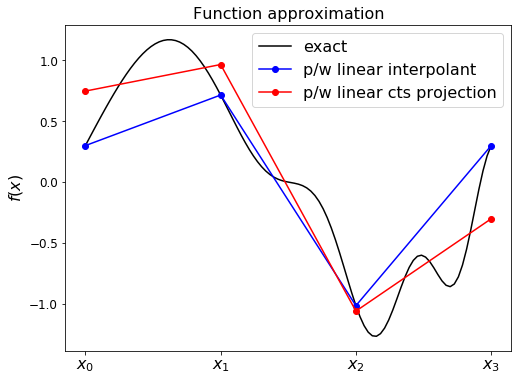

In [53]:
def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)

# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1./N_elements
x_nodes = np.linspace(0,1,N_nodes)
y_nodes = f(x_nodes)
x_fine = np.linspace(0., 1. ,100)

# construct mass matrix
Mass_CG = mass_matrix(x_nodes)


# construct RHS vector
RHS_CG = np.zeros(N_nodes)

# loop over internal nodes
for node in range(1, N_nodes-1):
    # and integrate our function multiplied by the corresponding cts basis function
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node+1], integrand, 100 )

# now the end nodes
node = 0
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 100 )
node = N_nodes-1
phi_i = hat_function(node, x_nodes)
# integrate our function multiplied by the corresponding cts basis function
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node], integrand, 100 )


approx_CG = sl.solve(Mass_CG, RHS_CG)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
#ax1.set_xlabel('$x$', fontsize=16)
ax1.set_xticks((x_nodes[0],x_nodes[1],x_nodes[2],x_nodes[3]))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$', ), fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
# plot the exact function on a fine mesh
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
# plot the p/w linear interpolant on a coarse mesh
ax1.plot(x_nodes, f(x_nodes), 'bo-', label='p/w linear interpolant')
ax1.plot(x_nodes, approx_CG , 'ro-', label='p/w linear cts projection')
ax1.legend(loc='best', fontsize=16);

## Quality of approximation

Which of these is a better approximation?

Clearly the P1 interpolant if we ask the question of accuracy at the nodes only. 

But above we established that, by construction, our projection approach should yield a result that is optimal w.r.t. the $L^2$ norm, i.e. we cannot do any better.

The error computed using the $L^2$ norm for the solution obtained via projection should therefore be equal to or lower than the solution obtained by simple interpolation.

Let's check this


<img src="figures/P1vsCGvsDG_convergence.png" style="width: 600px">


What's the DG line? See homework and the image below - we can do even better if we allow more flexibility in the function space we seek our solution in!

<img src="figures/CG_DG_projection.png" style="width: 600px">

## RMS (root mean square) vs $L^2$ norm

Notice that I labelled the $y$ axes with RMS error rather than the $L^2$ norm. Why?

We want to compute

\begin{align*} 
e  := \| f - P_h\, f\|^2_{L^2(I)}
= \left( \int_I\, \left[f - P_h\, f\right]^2\, dx\right)^{1/2}.
\end{align*}

We can approximate the integral as

$$ \int_I\, \left[f(x) - (P_h\, f)(x)\right]^2\, dx 
\approx \sum_{i=1}^N  \, \left[f(s_i) - (P_h\, f)(s_i)\right]^2\,\Delta s.$$

I've introduced the variable $s$ here to emphasise that we want to evaluate the functions and their difference on a discrete mesh that is ideally finer than our finite element mesh, if we do this this will be an accurate approximation to the integral.

Now we note that (assuming our interval is of length 1) that

$$\Delta s = \frac{1}{N},$$

and finally we have

\begin{align*} 
e_{L^2} & := \| f - P_h\, f\|^2_{L^2(I)}\\[10pt]
&= \left( \int_I\, \left[f - P_h\, f\right]^2\, dx\right)^{1/2}\\[10pt]
&\approx \left( \frac{1}{N} \sum_{i=1}^N  \, \left[f(s_i) - (P_h\, f)(s_i)\right]^2 \right)^{1/2}
\\[10pt]
&=: e_{\text{RMS}}.
\end{align*}

Where if you look at the mathematical operations we perform here - the square **R**oot of the **M**ean of the **S**quares ... explains the name "RMS".


We can implement this in Python with something like

```Python
sl.norm(a - b) / np.sqrt(len(a))
```

where $a$ and $b$ are two vectors of discrete values. This is because the default norm is the [*Frobenius norm*](http://mathworld.wolfram.com/FrobeniusNorm.html), which is what we need without having divided through by $N$. Since this norm has already taken the square root, we just need to divide through by the square root  of $N$ to arrive at the RMS error. Of course you could also write your own function to compute the RMS error directly from the discrete data.

Ultimately the RMS error (norm) is the appropriate discrete analogue of the $L^2$ norm.

But be careful with its use on a non-uniform mesh!

# Solving boundary value problems (BVPs) using the FEM

Boundary value problems provide a useful example to explain spatial discretisation via the finite element method without needing to worry about variations in the time dimension that we will consider later.

## The fundamental form of the discretisation ignoring BCs

As we shall see below the details of the BCs we want to apply will change some of the discretisation details quite a lot, so initially we will explain things ignoring the BCs.

Our problem is to
find $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$

$$-u'' = f,$$

for a given source term $\,f$ (subject to some BCs yet to be defined).

It's a common convention to have this minus sign.

### Weak or variational form of problem

To progress with a FE discretisation we start from our continuous equation:

$$-u'' = f.$$

As we did with the $L^2$ projection of a function, we look for an approximation to the exact solution from within a finite dimensional function space that is as close as possible to the true solution.

We look for a function $u_h\in V$ such that for all $v\in V$

$$\int_I \,-u''\,v\,dx = \int_I \,f\,v\,dx.$$

It turns out that if we choose $V$ here to be the appropriate infinite dimensional function space then this form of the problem is equivalent to the underlying differential equation.

We call the original equation the *strong form* of the problem, while we call the version where we have multiplied by $v$ the *weak* or the variational form of the problem.



### Discretisation by restricting the function space to be finite dimensional

To discretise we simply replace the infinite dimensional $V$ with a finite dimensional $V_h$. 

For example we could choose the space of p/w linear functions we saw earlier.

This is what we mean by the finite element method approximating the solution function but not the underlying equation (or at least its weak form).

In practice we write the solution as 

$$u \approx u_h := \sum_{j=0}^n u_j \phi_j(x).$$

Previously when we considered the projection of a given function this led to a discrete system with the mass matrix on the LHS. 

Now that we are starting from a differential equation, this also leads to a discrete system, but with a *discretisation* matrix on the LHS that in general will be a bit different to the simple mass matrix.

So now we have the discretised problem - find $u_h\in V_h$ (or equivalently find the weights $u_j$, $j=0,\ldots n$) such that:

$$\int_I \,-u_h''\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

Again we are in principle in a situation where we have the same number of equations as we have unknowns and so should be able to solve this for the weights and hence the discrete solution.

### Choice of basis functions (aka choice of function space aka choice of "finite element")

But now we're confronted with a problem - assuming that we've made the choice to use linear basis functions then our discrete solution $u_h$ is p/w linear, so the second derivative appearing in the above (both the strong and the weak form of the equations) is zero everywhere and thus these equations don't make any sense - we cannot solve the problem. 

However, since with the FEM we're only asking for the weak (or variational or integral) form of the problem to be satisfied, we can perform *integration by parts* and instead require that

$$\int_I \,u_h'\,\phi'_i\,dx - \int_{\partial I} u_h'\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

Alternatively we could have considered quadratic (or higher) order basis functions and then we wouldn't have needed to integrate by parts for the weak form of the equations to make sense and provide us with a solution.

[NB. It would still have been *an option* for us to integrate by parts even in this p/w quadratic case, and as we shall see below we often make a decision to integrate by parts when we don't need to as it helps us to easily apply certain types of boundary conditions.]

The topic of basis function (or finite element) choice is a massive research area where considerations of accuracy, stability and efficiency come in. For a given PDE you would need to look at the literature for advice on the best choice to make.

A particularly important area is in coupled problems where choosing the same basis functions (or discrete function spaces) for all variables may not be a naturally stable option. An example of this is in the solution of the Navier-Stokes equations with the FEM, and we talk about an appropriate *finite element pair*, i.e. appropriate function spaces for velocity and pressure. The choice of linear functions for both velocity and pressure is not stable, while p/w quadratic functions for velocity and p/w linears for pressure is.

Things can get very "exotic" when we consider that we can choose discontinuous functions as well, and also in higher dimensions locate our nodes at the faces or edges of elements, rather than at the nodes as we would with the simplest basis functions.

### Finite element approximation

We now substitute in our approximate solution function

$$u_h := \sum_{j=0}^{n} u_j\,\phi_j,$$

into our weak form (where we are ignoring the boundary integral for for simplicity)

$$\int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 f\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=0, 1,\ldots, n. $$

Following this substitution the LHS can be written as 

\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx.
\end{align*}

We now introduce the notation for the "discretisation" (or sometimes for historical reasons "stiffness") matrix

$$ K_{ij} = \int_0^1 \phi_j'\, \phi_i' \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, n,$$

and the RHS vector

$$ b_i = \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.$$

Our discretised system can now be written as 

\begin{align*} 
\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx &= \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} u_j\, K_{ij} &= b_i, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n 
 \\[10pt]
\iff
K\boldsymbol{u} &= \boldsymbol{b}.
\end{align*}

If we solve this matrix equation for the coefficients $\boldsymbol{u}$ then we have a numerical solution to our problem.

This is just as it was for simple $L^2$ projection of a function, but now the mass matrix has been replaced by a similar discretisation matrix.  "Similar" in the sense that it is also tridiagonal and we can compute its entries in a very similar manner.

### Terminology

1. The basis function that appears in the expansion of the solution, i.e. the $\phi$ that appears in $u_h := \sum_j u_j\,\phi_j$ is termed a *trial function* - as it's used to form a "*trial* solution".  The corresponding function space $V$ the $\phi$'s are a basis for, and hence the space our numerical solution lives in, is called the "*trial space*".


2. The basis function we use when we multiply our equation by before integrating is called a "*test function*" as we are "testing" for orthogonality of this solution's residual to a function space spanned by these test functions. This function space is called the "*test space*".  


3. Note that in what we've seen above the trial functions are the same as the test functions.  This was the obvious and simplest choice (as we only needed to define a single set of basis functions and their derivatives etc) and having the same dimension meant we got $n+1$ equations for $n+1$ unknowns.  However, there are reasons that one may wish to choose the test space differently to the trial space. 


4. When we use the same space for test and trial functions the discretisation we end up with is called a **Galerkin** method (sometimes Bubnov-Galerkin), if different it is called a **Petrov-Galerkin** method

### Implementation

Recall that our basis functions are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

and so their derivatives are defined by

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

i.e. they are constant within elements.

Let's plot this to make sure it looks right.

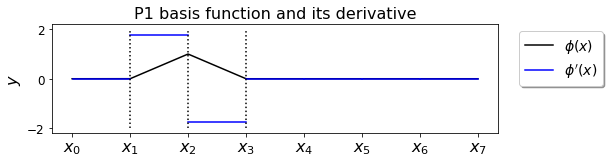

In [54]:
def hat_function_deriv(i, x_nodes):
    """ Derivative of linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (-1)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (1)/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (1)/dx[i-1], (-1)/dx[i] ] ,0.0)
    return hat

x_nodes = np.linspace(0,4,8)
# the following would give you a variable mesh!
#x_nodes = x_nodes + ((x_nodes[-1]-x_nodes[0])/5)*np.random.rand(len(x_nodes))

x_fine = np.linspace(0,4,1000)

fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_subplot(111)
ax1.set_xticks((x_nodes))
ax1.set_xticklabels(('$x_0$','$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$x_7$' ), fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('P1 basis function and its derivative', fontsize=16)

# you can change the following to be in [0,n]
node = 2
phi = hat_function(node, x_nodes)
ax1.plot(x_fine, phi(x_fine), 'k-',label='$\phi(x)$');
phi_x = hat_function_deriv(node, x_nodes)
for i in range(len(x_nodes)-1):
    ax1.plot(x_fine[(x_fine>x_nodes[i]) & (x_fine<x_nodes[i+1])], 
             phi_x(x_fine[(x_fine>x_nodes[i]) & (x_fine<x_nodes[i+1])]), 'b-',label="$\phi'(x)$" if i==0 else "")
ax1.plot([x_nodes[node-1],x_nodes[node-1]], [-2,2],'k:')
ax1.plot([x_nodes[node],x_nodes[node]], [-2,2],'k:')
ax1.plot([x_nodes[node+1],x_nodes[node+1]], [-2,2],'k:')
ax1.legend(loc="upper right", bbox_to_anchor=(1.25,1.0), shadow=True, ncol=1, fontsize=14)

The fact that the basis function derivatives that appear in the integrand are all constants over individual elements makes this discretisation matrix especially easy to evaluate. 

Let's consider an internal row $i$:

\begin{align*}
K_{ii} 
&= \int_0^1 \phi_i'\, \phi_i' \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_i' \,dx + \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_i' \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{1}{\Delta x_{i-1}} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{-1}{\Delta x_{i}} \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}^2} \,dx + \int_{x_{i}}^{x_{i+1}} \frac{1}{\Delta x_{i}^2} \,dx
\\[10pt]
&= \frac{\Delta x_{i-1}}{\Delta x_{i-1}^2} + \frac{\Delta x_{i}}{\Delta x_{i}^2}
\\[10pt]
&= \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}.
\end{align*}

Similarly,

\begin{align*}
K_{i,i-1} 
&= \int_0^1 \phi_i'\, \phi_{i-1}' \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i-1}' \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{1}{\Delta x_{i-1}}\, \frac{-1}{\Delta x_{i-1}} \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{-1}{\Delta x_{i-1}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{i-1}},
\end{align*}

and

\begin{align*}
K_{i,i+1} 
&= \int_0^1 \phi_i'\, \phi_{i+1}' \,dx 
\\[10pt]
&= 
\int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i+1}' \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}}\, \frac{1}{\Delta x_{i}} \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{-1}{\Delta x_{i}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{i}}.
\end{align*}

Now consider the case $i=0$:

\begin{align*}
K_{0,0} 
&= \int_0^1 \phi_0'\, \phi_0' \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_1} \phi_0'\, \phi_0' \,dx \\[10pt]
&= \int_{x_{0}}^{x_1} \frac{-1}{\Delta x_{0}}\, \frac{-1}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_1} \frac{1}{\Delta x_{0}^2} \,dx \\[10pt]
&= \frac{1}{\Delta x_{0}},
\end{align*}

and 

\begin{align*}
K_{0,1} 
&= \int_0^1 \phi_0'\, \phi_{1}' \,dx 
\\[10pt]
&= 
\int_{x_{0}}^{x_{1}} \phi_0'\, \phi_{1}' \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} \frac{-1}{\Delta x_{0}}\, \frac{1}{\Delta x_{0}} \,dx 
\\[10pt]
&= \int_{x_{0}}^{x_{1}} \frac{-1}{\Delta x_{0}^2} \,dx 
\\[10pt]
&= \frac{-1}{\Delta x_{0}},
\end{align*}

which by symmetry is that same as $K_{1,0}$. 

The entries for the $i=n$ row are defined similarly in terms of $\Delta x_n$.

In [55]:
N_elements_CG = 5
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)

K = np.zeros((N_nodes_CG, N_nodes_CG ))

K[1:-1,1:-1] = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)
# add in the top row entries
K[0,0] = 1. / dx[0]
K[0,1] = -1. / dx[0]
K[1,0] = -1. / dx[0]
# add in the bottom row entries
K[-1,-1] = 1. / dx[-1]
K[-1,-2] = -1. / dx[-1]
K[-2,-1] = -1. / dx[-1]

print('K = ')
print(K)

# compare to the mass matrix
%precision 3
print('\nM= ')
print(mass_matrix(x_nodes))

K = 
[[ 5. -5.  0.  0.  0.  0.]
 [-5. 10. -5.  0.  0.  0.]
 [ 0. -5. 10. -5.  0.  0.]
 [ 0.  0. -5. 10. -5.  0.]
 [ 0.  0.  0. -5. 10. -5.]
 [ 0.  0.  0.  0. -5.  5.]]

M= 
[[0.067 0.033 0.    0.    0.    0.   ]
 [0.033 0.133 0.033 0.    0.    0.   ]
 [0.    0.033 0.133 0.033 0.    0.   ]
 [0.    0.    0.033 0.133 0.033 0.   ]
 [0.    0.    0.    0.033 0.133 0.033]
 [0.    0.    0.    0.    0.033 0.067]]


## A simple problem with homogeneous Dirichlet BCs

Now let's complete the description of our problem through the addition of some boundary conditions.

### Problem description

Find $u\equiv u(x)$ which satisfies the ODE over the interval $[0,1]$

$$-u'' = f,$$

for a given source term $\,f$, with homogeneous Dirichlet boundary conditions:

$$ u(0) = u(1) = 0.$$

Physically we can interpret this as the steady state solution to a diffusion problem with a source given by $f$ and the solution "clamped" at the value zero at the ends of the domain.

To begin let's consider the problem with $f\equiv 1$ which has the exact solution $u=-x(x-1)/2$.

### Finite element approximation

For this version of the problem (i.e. with Dirichlet boundary conditions) we have to make a few changes to what we did above for the generic case with no boundary conditions.

In the case of Dirichlet BCs we know the value of the solution at the ends of the domain, and so we do not need to solve for the discrete values $u_0$ and $u_n$. 

[NB. This choice is termed the strong imposition of Dirichlet BCs, we can also choose to impose BCs "weakly" where they are only enforced in an approximate sense].

Furthermore, since these take the values zero in this case
the approximate solution we substitute into our weak form is therefore 

$$u_h := \sum_{j=1}^{n-1} u_j\,\phi_j.$$

Said another way, we look for a solution to our problem in the space of p/w linear functions which are zero at the boundaries:

$$V_h^0 := \left\{v \in V_h | v(0)=v(1)=0\right\}.$$

In our weak form we test against all $v\in V_h^0$, and since all these $v$ vanish at the boundary
this justified why in this case we can simply ignore the boundary term in our weak form:

$$\int_I \,u_h'\,\phi'_i\,dx = \int_I \,f\,\phi_i\,dx.$$

We can again equivalently instead consider basis functions and ask that our solution satisfies

$$\int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 f\,\phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1, $$

where now $i$ ranges over 2 fewer values (as $V_h^0$ is now $n-1$ rather than $n+1$ dimensional on our mesh).


Substituting in our form for our numerical solution again leads us to the matrix system

$$K\boldsymbol{u} = \boldsymbol{b},$$

where $K$ and $\boldsymbol{b}$ are defined as before, but without the first and last rows we had previously.


In [56]:
# don't need the composite version of Simpson's rule here - want the version
# that is able to integrate over a single interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

In [57]:
def f(x):
    return 1.0

def u_exact(x):
    return -0.5*x*(x-1)

N_elements_CG = 9
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)

# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG -2 , N_nodes_CG -2 ))

# we only need the internal entries of the A defined above in this case
K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

print(K)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
RHS = np.zeros(N_nodes_CG - 2)
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

u = sl.solve(K,RHS)

[[18. -9.  0.  0.  0.  0.  0.  0.]
 [-9. 18. -9.  0.  0.  0.  0.  0.]
 [ 0. -9. 18. -9.  0.  0.  0.  0.]
 [ 0.  0. -9. 18. -9.  0.  0.  0.]
 [ 0.  0.  0. -9. 18. -9.  0.  0.]
 [ 0.  0.  0.  0. -9. 18. -9.  0.]
 [ 0.  0.  0.  0.  0. -9. 18. -9.]
 [ 0.  0.  0.  0.  0.  0. -9. 18.]]


error (RMS at nodes only) =  5.2616768192817116e-17


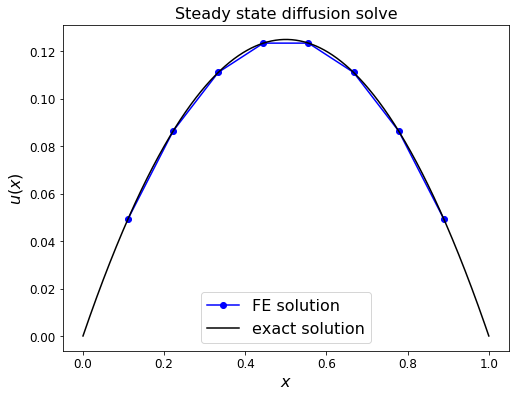

In [58]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, -0.5*x_fine*(x_fine-1), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - (-0.5*x_nodes[1:-1]*(x_nodes[1:-1]-1)) )
      /np.sqrt(len(u)) )

### Comments

- We could of course add back in the fact that $u_h(0)=u_h(1)=0$ to get a solution plot that extends all the way to the boundaries.


- Notice that we have the exact (to round off error) solution at the nodes. This is because we can evaluate the RHS vector exactly (i.e. no errors are introduced in this step) and also as our scheme is of high enough order to be able to integrate this problem exactly.


Let's try a more complicated problem.

## An example with a more complex RHS with homogeneous Dirichlet BCs

Now let's consider an example of a problem with a more complex $f$ and hence solution.

The complexity of $f$ means we have more to do when evaluating the RHS vector, but still having homogeneous Dirichlet BCs means we don't have to change the LHS.

error (RMS at nodes only) =  5.160570601632145e-06


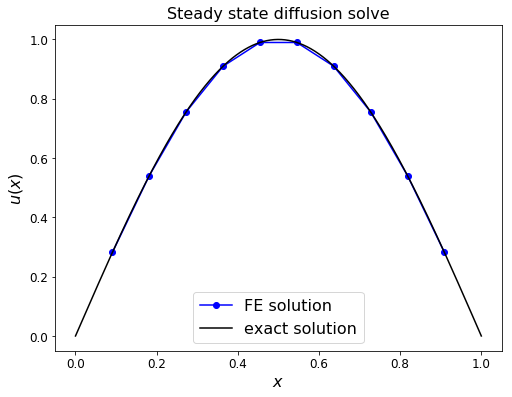

In [59]:
# This is essentially a Method of Manufactured Solutions (MMS) verification - 
# we define the solution first that satisfies the BCs
# and then substitute into the BVP to find the appropriate RHS source term

# rather than a quadratic solution as previously, let's assume a non polynomial
# form for the exact solution:
def u_exact(x):
    return np.sin(np.pi*x)

# given this choice we can compute the corresponding form of the RHS function f
# which for our simple BVP is given just by   -u''
def f(x):
    return (np.pi**2)*np.sin(np.pi*x)

# discretise and solve
N_elements_CG = 11
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
    # if we increase the number of intervals we can get arbitrarily small errors at the nodes
    
u = sl.solve(K,RHS)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

### A convergence analysis

As part of your debugging and verification of code, convergence to a known exact solution is vital. Let's see an example of this.

'annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,\n                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))\nannotation.slope_marker((1e-2, 3e-10), (4, 1), ax=ax1,\n                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))'

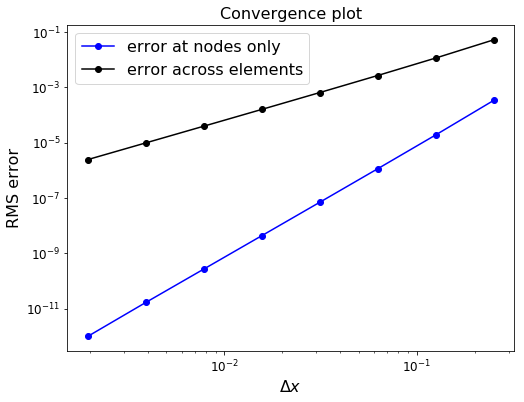

In [75]:
def u_exact(x):
    return np.sin(np.pi*x)

def f(x):
    # just -u''
    return (np.pi**2)*np.sin(np.pi*x)

# some meshes of increasingly finer resolution to loop over
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

# compute the solution and store the corresponding error on each mesh
for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    u = sl.solve(K,RHS)

    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((1e-2, 3e-10), (4, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

### Comments

So our solver is 4th order accurate in terms of the nodal values, while it is second order accurate in the norm we really care about here.

## Final comments

That might have all seemed like a lot of work (to essentially arrive at something not dis-similar to what FDM could do) with a lot of additional computational overhead (e.g. all those quadratures we did not need with FDM).

But the power of the FEM really comes into play when

1. we move to higher dimensions, and/or


2. we us more exotic basis functions, and/or


3. we want to make use of some of the theoretical properties that can be established with the FEM, e.g. rigorous error estimators that can be used to guide adaptive mesh algorithms to achieve accuracy and efficiency.


An important final thing for you to understand is how we would go about discretising more complex equations - to help with this a homework question asks you to consider the problem $u''+u=f$.

# Implementation of the FEM

## Local assembly over elements

### The underlying idea

When we formed the discretisation matrices in the examples we considered above, (both the projection as well as the solution of BVPs examples), recall that we looped over nodes and did an integral over the elements either side (apart from at boundaries).

These nodes corresponded with the entry of the load vector we were computing, or said another way the trial function corresponding to that node.

For each node we constructed the corresponding entry of the load vector by integrating using Simpson's rule the appropriate integral ($f\,\phi_i$) over the elements on each side of that node.

In general we constructed the left hand side discretisation matrix directly (i.e. we wrote functions that used `np.diag`) using our analytical knowledge of the integrals (e.g. of $\phi_i\,\phi_j$ in the case of the mass matrix, and products of the derivatives of the basis functions in the BVP case), and the fact that they took a simple tridiagonal form. 

Recall that we did demonstrate through an application of Simpson's rule that quadrature recreated our analytical result for the mass matrix.

However, this means of constructing the left hand side matrix won't be possible for more complex problems, and in the case of the load vector an approach of looping over nodes and then visiting each surrounding element won't be optimal in higher dimensions

A better approach, termed *assembly* or *local assembly*, which addresses both issues, is instead to loop over the elements, compute the required integrals only over that element, and add the appropriate results of these integrals into the global discretisation matrices.

To help clarify this idea let's consider the example of the mass matrix.

### Local assembly for the mass matrix

The mass matrix $M$ is defined to be the matrix with the entries

$$ M_{ij} = \int_\Omega \,\phi_i(x)\,\phi_j(x)\,  dx. $$

We noted that given the form of our basis functions (i.e. finite compact support) that $M$ is *sparse* - for a given row, $i$, then the integrand in the definition above will be zero for all $j$ values other than $j=i$, and $j=i\pm 1$, i.e. the mass matrix is tridiagonal in 1D.

We demonstrated that an internal row (the $i$-th row) of the tridiagonal mass matrix has the entries

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{i-1}}{6} \;\;\;\;\;  \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}  \;\;\;\;\; \frac{\Delta x_{i}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right], $$


with the first and last rows

$$\left[\frac{\Delta x_{0}}{3}  \;\;\;\;\; \frac{\Delta x_{0}}{6} \;\;\;\;\; 0 \;\;\;\;\; \cdots \;\;\;\;\;  0  \right], $$

and

$$\left[0 \;\;\;\;\; \cdots \;\;\;\;\; 0 \;\;\;\;\; \frac{\Delta x_{n}}{6} \;\;\;\;\;  \frac{\Delta x_{n}}{3}\right]. $$


Combining we have

$$ M = 
\begin{pmatrix}
\frac{\Delta x_0}{3}  & \frac{\Delta x_0}{6} & & &  
\\
\frac{\Delta x_0}{6}  & \left(\frac{\Delta x_0}{3} + \frac{\Delta x_1}{3}\right) & \frac{\Delta x_1}{6} & &  \\
&\frac{\Delta x_1}{6}  & \left(\frac{\Delta x_1}{3} + \frac{\Delta x_2}{3}\right) & \frac{\Delta x_2}{6}  &  \\
&  &  \ddots & &  
\\
& &\frac{\Delta x_{n-1}}{6}  & \left(\frac{\Delta x_{n-1}}{3} + \frac{\Delta x_n}{3}\right) & \frac{\Delta x_n}{6}  \\
& &   &  \frac{\Delta x_n}{6} & \frac{\Delta x_n}{3}
\end{pmatrix}.
$$

Notice first that this is equivalent to 


$$ M = 
\begin{bmatrix}
\frac{\Delta x_0}{3} & \frac{\Delta x_0}{6} & &  \\
\frac{\Delta x_0}{6} & \frac{\Delta x_0}{3} & & \\ 
& & & \\
& & & \\
& & & \\
& & & 
\end{bmatrix} 
+
\begin{bmatrix}
& & & \\
& \frac{\Delta x_1}{3} & \frac{\Delta x_1}{6}  & \\ 
& \frac{\Delta x_1}{6} & \frac{\Delta x_1}{3}  &  \\
& & & \\
& & & \\
& & & 
\end{bmatrix} 
+ \ldots +
\begin{bmatrix}
& & & \\
& & & \\
& & & \\
& & & \\
& & \frac{\Delta x_n}{3} & \frac{\Delta x_n}{6} \\
& &\frac{\Delta x_n}{6}  & \frac{\Delta x_n}{3}  
\end{bmatrix},
$$

i.e. the global mass matrix is equivalent to the summation of $2\times 2$ matrices which all take the form

$$\frac{1}{6}
\begin{bmatrix}
2 & 1\\
1 & 2
\end{bmatrix}{\Delta x_i}.
$$

Note that this smaller matrix only involves the size of element $i$, and as we shall see can be associated only with element $i$.  We therefore call it the *local element mass matrix* for element $i$.  Notice also that this same definition applies equally well to the first and last elements - we don't need to do anything special/different at boundaries.

Considering element $i$, we can see that the above $2\times 2$ sub-matrix block comes from the following contributions

$$
\begin{bmatrix}
\int_{e_i} \,\phi_i(x)\,\phi_i(x)\, dx     & \int_{e_i} \,\phi_i(x)\,\phi_{i+1}(x)\, dx \\
\int_{e_i} \,\phi_i(x)\,\phi_{i+1}(x)\, dx & \int_{e_i} \,\phi_{i+1}(x)\,\phi_{i+1}(x)\, dx
\end{bmatrix}
$$

where $e_i = [x_i,x_{i+1}]$ is the $i$-th element.

Note that when we sum up all these individual local mass matrices, each main diagonal (other than the first and last) will receive two contributions. Note that all that is happening here is what we saw analytically earlier when we integrated over the two elements either side of the node under consideration in order to derive an expression for the mass matrix.

To see that this makes sense another way, first we note that the total integral can be split up over elements:


\begin{align*}
M_{ii} &= \int_\Omega \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
&= \sum_k\,\int_{e_k} \,\phi_i(x)\,\phi_i(x)\,  dx.
\end{align*}

Then we note that most of the elemental contributions will be zero since the integrand will be zero over them. For example for the diagonal entries we only have to consider

\begin{align*}
M_{ii} 
& = \sum_k\,\int_{e_k} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{e_{i-1}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{e_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& = \int_{x_{i-1}}^{x_{i}} \,\phi_i(x)\,\phi_i(x)\,  dx + \int_{x_{i}}^{x_{i+1}} \,\phi_i(x)\,\phi_i(x)\,  dx\\[5pt]
& \; \vdots\\[5pt]
& = \frac{\Delta x_{i-1}}{3} + \frac{\Delta x_{i}}{3}.
\end{align*}




The overall procedure underlying *local assembly* is therefore to


1. loop over elements


2. calculate the individual contributions to the local element mass matrix by considering combinations of the basis functions corresponding to the local node numbers (i.e. the four entries in the $2\times 2$ sub-matrix block above)


3. Identify the appropriate locations of the global mass matrix and *add* the current element's contributions to the values already in these locations


Note that for fully unstructured meshes in higher dimensions, there will be multiple contributions feeding into each entry of the global mass matrix.

Note also that exactly the same procedure can be used to construct more complex discretisation matrices (e.g. the matrix $A$ in the BVP section) as well as the RHS load vectors.

### Example - projection

Let's demonstrate the assembly process through an example.

Recall our initial example where we "projected" a general function $\,f\,$ into the space of p/w linear functions.

First let's run our code from the last lecture which involved us defining the mass matrix analytically, and computing the RHS load vector through a **loop over nodes** (and the integrals on the elements either side) - what we just said isn't really a viable approach in higher dimensions.

The following is a reminder of the code we wrote to set up and solve the appropriate matrix system to yield the solution at the mesh vertices earlier - we repeat it here to give us something to verify our new approach/code against.

In [61]:
# discrete data
N_nodes = 4
N_elements = N_nodes - 1
dx = 1./N_elements
x_nodes = np.linspace(0,1,N_nodes)

Mass_CG = mass_matrix(x_nodes)

# construct RHS vector
RHS_CG = np.zeros(N_nodes)

# loop over internal nodes
for node in range(1, N_nodes-1):
    # and integrate our function multiplied by the corresponding cts basis function
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # simpsons with number intervals = 2 can integrate this exactly
    RHS_CG[node] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 100 )

# now the end nodes
node = 0
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node], x_nodes[node+1], integrand, 50 )
node = N_nodes-1
# integrate our function multiplied by the corresponding cts basis function
phi_i = hat_function(node, x_nodes)
integrand = lambda x : f(x) * phi_i(x)
RHS_CG[node] = simpsons_composite_rule(x_nodes[node-1], x_nodes[node], integrand, 50 )

approx_CG = sl.solve(Mass_CG, RHS_CG)

print('Mass matrix =')
pprint(Mass_CG)
print('\nRHS vector =')
pprint(RHS_CG)

Mass matrix =
array([[0.111, 0.056, 0.   , 0.   ],
       [0.056, 0.222, 0.056, 0.   ],
       [0.   , 0.056, 0.222, 0.056],
       [0.   , 0.   , 0.056, 0.111]])

RHS vector =
array([0.544, 2.598, 2.598, 0.544])


Let's recode this using *local assembly* for both the mass and RHS vectors, and check we get the same result.

We need to:


1. Loop over elements.


2. Loop over combinations of the local basis functions.


3. Perform the quadratures only over the local element.


4. Add in the contributions to the appropriate locations of the global matrices/vectors.

### Unstructured mesh data structures (the connectivity matrix)

In order to know where the local contributions contribute to the global matrices, we make use of the so-called *connectivity matrix*.

It will seem a triviality in 1D, but it's vitally important in higher dimensions.

The following image presents a schematic of an unstructured mesh data structure, or connectivity, in the simple 1D case and assuming that we have two nodes per element (i.e. the p/w linear case), and that these are located at the ends of the elements (other more complex choices are possible!)

<img src="figures/connectivity_1d.svg" style="width: 500px">

- Blue are the *element numbers*


- Red are the *local node numbers* (as in local to that element)


- Black are the *global node numbers*


The connectivity can be described by the so-called connectivity matrix, which again in 1D takes the particularly simple form

\begin{pmatrix}
    0 & 1 & \ldots & i-1 & i   & i+1 & \ldots & n \\
    1 & 2 & \ldots & i   & i+1 & i+2 & \ldots & n+1
\end{pmatrix}

the column being the element, the row the local node number, and the entry of the matrix then being the global node number.

The size of the connectivity matrix is therefore: 

$$\text{the number of local nodes per element}\;\;\times\;\;\text{the number of elements},$$

and it provides a mapping from elements to global node numbers that we use to tell us where to add in the entries we compute over a local element into the global discretisation matrices.

In [62]:
# the connectivity matrix in 1D we need to use for this case.

# mesh information
N_nodes = 4
N_elements = N_nodes - 1
x_nodes = np.linspace(0,1,N_nodes)
dx = np.diff(x_nodes)

# number of nodes per element 
N_loc = 2

# the connectivity matrix giving us a mapping from local to global numbering
connectivity_matrix = np.zeros((N_loc, N_elements), dtype=int)
for element in range (N_elements):
    connectivity_matrix[0, element] = element
    connectivity_matrix[1, element] = element + 1
    
print(connectivity_matrix)

[[0 1 2]
 [1 2 3]]


Now let's write some code to perform assembly to compute both the mass matrix as well as the load vector, and check that we get the same results as our previous implementation which returned

```Python
Mass matrix =
array([[0.11111111, 0.05555556, 0.        , 0.        ],
       [0.05555556, 0.22222222, 0.05555556, 0.        ],
       [0.        , 0.05555556, 0.22222222, 0.05555556],
       [0.        , 0.        , 0.05555556, 0.11111111]])

RHS vector =
array([ 0.13686339,  0.19747647, -0.1988013 , -0.0924463 ])
```

M = 
array([[0.111, 0.056, 0.   , 0.   ],
       [0.056, 0.222, 0.056, 0.   ],
       [0.   , 0.056, 0.222, 0.056],
       [0.   , 0.   , 0.056, 0.111]])

RHS = 
array([ 0.137,  0.197, -0.199, -0.092])

approx_CG = 
array([ 0.748,  0.967, -1.061, -0.302])


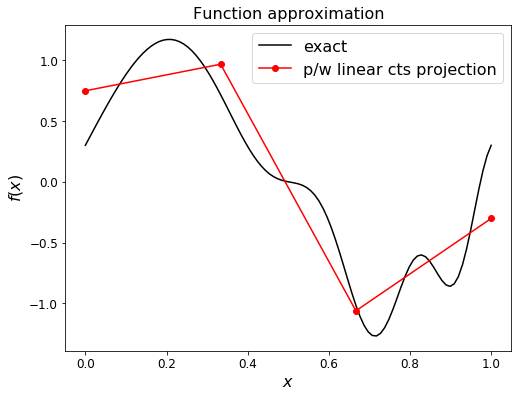

In [63]:
# project f(x) to p/w linears using local assembly to form mass matrix and RHS load vector

def f(x):
    return np.sin(2*np.pi*x) + 0.3*np.cos(3.*2.*np.pi*x**2)
          
# construct mass matrix and RHS vector using local assembly
M = np.zeros((N_nodes, N_nodes))
RHS = np.zeros(N_nodes)
# loop over elements
for element in range(N_elements):
    # loop over local nodes (i: test functions)
    for i_local in range(N_loc):
        i_global = connectivity_matrix[i_local, element]
        # add contribution to RHS vector
        if(i_local == 0):
            integrand = lambda xi: f( (x_nodes[i_global] + 0.5*dx[element]) + 
                                     0.5*dx[element]*xi ) * 0.5*(1-xi)
        else:
            # here i_global corresponds to node i+1 so redefine x(xi) accordingly
            integrand = lambda xi: f( ((x_nodes[i_global]-dx[element]) + 0.5*dx[element]) 
                                     + 0.5*dx[element]*xi ) * 0.5*(1+xi)
        RHS[i_global] += 0.5*dx[element] * simpsons_composite_rule(-1, 1, integrand, 100 )
        # Now for the mass matrix
        # loop over local nodes (j: trial functions)
        for j_local in range(N_loc):
            j_global = connectivity_matrix[j_local, element]
            if(i_local == 0):
                if(j_local == 0):           
                    integrand = lambda xi: 0.5*(1-xi) * 0.5*(1-xi)
                else:
                    integrand = lambda xi: 0.5*(1-xi) * 0.5*(1+xi)
            else:
                if(j_local == 0):           
                    integrand = lambda xi: 0.5*(1+xi) * 0.5*(1-xi)
                else:
                    integrand = lambda xi: 0.5*(1+xi) * 0.5*(1+xi)
            # add in the local contribution to the global mass matrix
            M[i_global,j_global] += 0.5*dx[element] * simpsons_rule(-1, 1, integrand, 1 )

print('M = ')       
pprint(M)
print('\nRHS = ')
pprint(RHS)

approx_CG = sl.solve(M, RHS)

print('\napprox_CG = ')
pprint(approx_CG)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
ax1.set_title('Function approximation', fontsize=16)
# plot the exact function on a fine mesh
x_fine = np.linspace(0,1,100)
ax1.plot(x_fine, f(x_fine), 'k-', label = 'exact')
ax1.plot(x_nodes, approx_CG , 'ro-', label='p/w linear cts projection')
ax1.legend(loc='best', fontsize=16);

### Quadrature over the local element (change of variables to a reference element)


We've played one final trick in the implementation above.

It turns out that, especially in higher dimensions and for more complicated basis functions, that it is advantageous to transform our integrals over each individual element so that they are all performed over the same "reference" element.

Consider the schematic below.


<img src="figures/reference_elements_1d.svg" style="width: 800px">


### Transformation to the reference element

It is common to define the reference element in 1D to be either $\,e_\text{ref}:=[0,1]\,$ or $\,e_\text{ref}:=[-1,1]\,$.  

As per the schematic we shall choose the latter option.

We use $\,\xi\,$ as the notation of the coordinate over the reference element.

We can then define the linear mapping between the physical $\,x\in[x_L, x_R]\,$ and the reference element $\,\xi\in[-1,1]\,$ via

\begin{align*} 
x &= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\left(x_R - x_L\right)\xi \\[5pt]
&= \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi.
\end{align*}

where $\,\Delta x = x_R-x_L\,$ is the *local* mesh size.

Integrals over a physical element $\,e_i\,$ can then be computed as in the following example of a mass matrix entry:

\begin{align*}
\int_{e_i} \,\phi_{i}(x)\,\phi_{i}(x)\, dx 
&\equiv 
\int_{x_i}^{x_{i+1}} \,\phi_{i}(x)\,\phi_{i}(x)\, dx \\[10pt]
& = 
\int_{-1}^{1} \,\phi_{i}(\xi)\,\phi_{i}(\xi)\, |J| \, d\xi\\[10pt]
& \equiv 
\int_{e_{\text{ref}}} \,\phi_{i}(\xi)\,\phi_{i}(\xi)\, |J| \, d\xi
\end{align*}

where $|J|$ is the Jacobian determinant which we always need to remember to include when we perform a [*change of variables in an integral*](http://mathworld.wolfram.com/ChangeofVariablesTheorem.html).

In our case

$$ J = \frac{dx}{d\xi} = \frac{1}{2}\Delta x,$$

where $\Delta x$ is understood to be the local element size.

We need to consider how the basis functions $\phi_i$ and $\phi_{i+1}$ are defined in terms of the variable $\xi$, i.e. what they look like in the reference element. But this is simple as we know for linear basis functions they are 1 at one node, 0 at the other, and linear in between. The two basis functions on the reference element are therefore in the linear case simply

$$ \phi_0(\xi) := \frac{1}{2}( 1 - \xi),\;\;\;\;\;\;\;\; \phi_1(\xi) := \frac{1}{2}( 1 + \xi), $$

where the subscripts 0 and 1 refer to the *local* node number on the element.

These take a particularly simple form; this is one of the advantages of the reference element approach and extends to higher order elements. 

#### Aside: quadratic basis functions

For example let's consider what quadratic basis functions would look like, and how easily they can be defined, on the reference element:

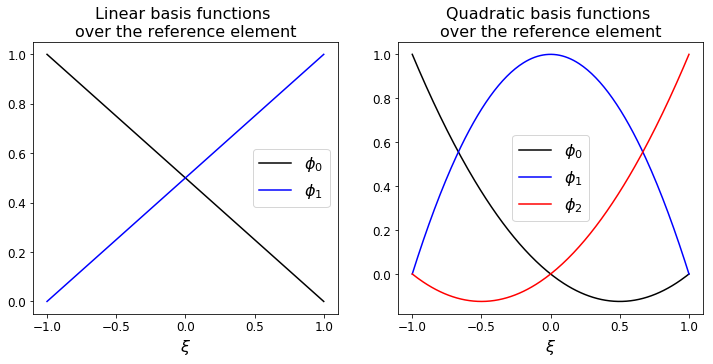

In [64]:
fig = plt.figure(figsize=(12, 5))
fig.tight_layout(w_pad=6, h_pad=6)
ax1 = fig.add_subplot(121)
ax1.set_xlabel(r'$\xi$', fontsize=16)
ax1.set_title('Linear basis functions \nover the reference element', 
              fontsize=16)
xi = np.linspace(-1, 1, 200)
# the two linear basis functions
ax1.plot(xi, 0.5*(1-xi), 'k-', label='$\phi_0$')
ax1.plot(xi, 0.5*(1+xi), 'b-', label='$\phi_1$')
ax1.legend(loc='best', fontsize=16)

ax1 = fig.add_subplot(122)
ax1.set_xlabel(r'$\xi$', fontsize=16)
ax1.set_title('Quadratic basis functions \nover the reference element', 
              fontsize=16)
xi = np.linspace(-1, 1, 200)
# the three quadratic basis functions
ax1.plot(xi, 0.5*(xi-1)*xi, 'k-', label='$\phi_0$')
ax1.plot(xi, 1 - xi**2, 'b-', label='$\phi_1$')
ax1.plot(xi, 0.5*(xi+1)*xi, 'r-', label='$\phi_2$')
ax1.legend(loc='best', fontsize=16)

**The mass matrix**

Following through the example case of the mass matrix and p/w linear basis functions we have

\begin{align*}
\int_{e_i} \,\phi_{i}(x)\,\phi_{i}(x)\, dx 
&\equiv 
\int_{x_i}^{x_{i+1}} \,\phi_{i}(x)\,\phi_{i}(x)\, dx \\[10pt]
& = 
\int_{-1}^{1} \,\phi_{0}(\xi)\,\phi_{0}(\xi)\, |J| \, d\xi\\[10pt]
& = \int_{-1}^{1} \, \frac{1}{2}( 1 - \xi) \, \frac{1}{2}( 1 - \xi) \, \frac{\Delta x_i}{2} \, d\xi
\\[10pt]
& = \frac{\Delta x_i}{8} \int_{-1}^{1} \, ( 1 - \xi)^2 \,  d\xi
\\[10pt]
& = \frac{\Delta x_i}{8} \left[ -\frac{1}{3}( 1 - \xi)^3 \right]_{-1}^{1}\,  d\xi
\\[10pt]
& = \frac{\Delta x_i}{3}, 
\end{align*}

which agrees with what we've computed before (which of course it should do!). 

The other entries we need follow similarly:

$$
\int_{e_i} \,\phi_{i+1}(x)\,\phi_{i+1}(x)\, dx =  \frac{\Delta x_i}{3},
$$

$$
\int_{e_i} \,\phi_{i}(x)\,\phi_{i+1}(x)\, dx =  \frac{\Delta x_i}{6}.
$$


**The load vector**

For contributions to the load vector of the form

$$ \int_{e_{i}}\,f(x)\,\phi_i(x)\, dx \equiv \int_{x_{i}}^{x_{i+1}} \,f(x)\,\phi_i(x)\, dx,$$

we actually compute over the reference element the following

\begin{align*} 
\int_{x_{i}}^{x_{i+1}} \,f(x)\,\phi_i(x)\, dx
& = \int_{-1}^{1} \,f(x(\xi))\,\phi_0(\xi)\, \frac{\Delta x}{2} \, d\xi \\[10pt]
& = \frac{\Delta x}{2}
\int_{-1}^{1} \,f\left( \frac{1}{2}\left(x_L+x_R\right) + \frac{1}{2}\Delta x\,\xi \right) \,\frac{1}{2}( 1 - \xi) \, d\xi,
\end{align*}

where $\phi_0$ refers to the "first" basis function on the reference element (over element $e_i$ it would be $\phi_{i+1}(x)$ that corresponds to the local basis function $\phi_1(\xi)$).

### Local assembly for integrands that involve derivatives

So now we know how to assemble the contributions which feed into the mass matrix and the RHS load vector.

The final issue we need to consider is how to deal with derivatives of basis functions. 

For example, from the BVP section of the previous lecture we know that we needed to consider integrals of the form

$$\int_0^1 \phi_j'\, \phi_i' \,dx,$$

where 

$$\phi_i' \equiv \frac{d}{dx}\phi_i(x).$$

When transformed to the reference element we are therefore going to need to evaluate the $x$ derivative of the transformed basis functions, e.g. 

$$\frac{d}{dx}\phi_0(\xi) 
\;\;\;\;\;\;\; \text{where}\;\;\;\;\; \;\;\; 
\phi_0(\xi):=\frac{1}{2}( 1 - \xi).$$

How do we do this?  Via the chain rule:

$$\frac{d}{dx}\phi_0(\xi) = \frac{d}{d\xi}\phi_0(\xi)\, \frac{d\xi}{dx} = \phi'_0(\xi)\, \frac{d\xi}{dx},$$

and we know that 

$$ \frac{d\xi}{dx} = \left( \frac{dx}{d\xi} \right)^{-1} = \frac{2}{\Delta x}, $$

and for our linear basis functions

$$\phi'_0(\xi) = -\frac{1}{2}\;\;\;\;\;\;\;\; \text{and}\;\;\;\;\;\;\;\; 
\phi'_1(\xi) = \frac{1}{2}.$$


In higher dimensions we have something similar, we just need to make use of the Jacobian matrix.


## Time-stepping

We now have all we need to implement a FEM based solver for pretty much any PDE in any spatial dimension (e.g. we could of course quite easily now re-implement our BVP solver from earlier using local assembly).

But how do we deal with time-dependent problems, i.e. with time derivatives?

Consider time-dependent diffusion written in the form 

$$\frac{\partial u}{\partial t} = \kappa\frac{\partial^2 u}{\partial x^2}, $$

and assuming for simplicity that the diffusivity $\kappa$ is constant.

The weak/variational form of this problem can be written as (ignoring boundary terms)

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx = 0, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function 

$$u_h := \sum_{j=0}^{n} u_j\,\phi_j,$$

and restricting the test functions to the appropriate finite-dimensional space ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{i,j} + \kappa\sum_{j=0}^{n} u_j\, K_{ij} &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

Or in matrix form

$$
M\, \frac{d \boldsymbol{u}}{d t} + \kappa\, K\,\boldsymbol{u} = \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion we saw previously, and $M$ is the mass matrix. 

To discretise in time we replace the time derivative with a finite difference approximation. 

Suppose we want to implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson), then we have to consider the system

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + \kappa\, K\,\left(\theta \left(\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right)\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,\kappa\, K \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,\kappa\, K \right) \boldsymbol{u}^{n}.$$

But this is just a matrix system for the solution at the new time level we can solve using linear solvers we've seen before.

[Make sure you can reconcile this expression with the line in the code below where the LHS matrix and RHS vector are formed just before calling a linear solver].

## A finite element solver in 1D

Let's put all these things together and write a general solver for time-dependent diffusion.

### Mesh generation

In 1D this is pretty much trivial, even if we wanted non-uniform resolution.

We will see some 2D examples later.

In a single dimension mesh generation is trivial

<img src="figures/mesh_1d.svg" style="width: 800px">

In [65]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of elements.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh (somehow) compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

### Generate unstructured mesh data structures

As seen above.

In [66]:
def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

### Define basis functions and their derivatives

Now we only actually need to know the values of our basis functions (and their derivatives) at the locations they are used/evaluated.  

In practice this is only at the locations of our quadrature points, and as discussed above we only need these over the reference element.

In the case of Simpson's rule restricted to a single element, for example, we need to know the values of the basis functions at the end points of the element as well as the midpoint. These values are clearly zero or one at the ends, and one half at the midpoint. In the case of first derivatives, these will be constant over an element.

Since we know with local assembly we will consider every basis function which has support over that element, the function we define below returns values for that number of basis functions - here two.

In [67]:
def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

### Define quadrature rule

We need a corresponding quadrature rule - here we implement Trapezoidal and Simpson's, with the knowledge that Simpson's can integrate exactly quadratics (as we get from the product of two p/w linears over an element).

In [68]:
def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

### Local element assembly

Perform the integrals over a single element and add in the contributions to the global discretisation matrices as known from the connectivity matrix.

In [69]:
def assembly_local(M, K, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] # dx/2 here is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix     

### Global assembly

A function to loop over the elements.

The shape functions don't change, but the derivatives of the shape functions do if the element size/shape changes so need to recompute these for each element.

In [70]:
def assembly_global(M, K, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        assembly_local(M, K, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

### Apply boundary conditions

For simplicity we assume homogeneous Neumann BCs as one option (as this means we literally do nothing to the discretisation matrix and RHS vector).

We also assume inhomogeneous (which has homogeneous as a special case of course) Dirichlet conditions, but implement this via the "big spring" method which involves replacing the diagonal with a big number and placing the Dirichlet BC value multiplied by the big number in the corresponding RHS entry - why does this approximate a Dirichlet BC?

In [71]:
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')

### Define initial condition

And as it's a time-dependent problem we need an initial condition. 

Let's just code up a simple Gaussian to demonstrate with diffusion.

In [72]:
def initial_condition(x, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return 1.0 * np.exp( -(x - 0.5)**2 / 0.005)
    else:
        raise Exception('Option not implemented.')        

### Set up problem and time step

Now define the appropriate physical and numerical parameters and make use of the above functions to "assemble" the fully discrete system which recall was of the form:

$$ \left( M + \theta\,\Delta t \,\kappa\, K \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,\kappa\, K \right) \boldsymbol{u}^{n}.$$

In [73]:
# domain size
Lx = 1.
kappa = 0.01

# mesh data
N_nodes_CG = 51
N_elements_CG = N_nodes_CG - 1

# define some numerical parameters
N_loc = 2
N_gi = 3

# generate mesh
x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
connectivity_matrix = connectivity(N_loc, N_elements_CG)

# time stepping
dt = 0.001
t = 0 
t_end = dt*1000
theta = 0.
u_ic = initial_condition(x_nodes)

print('r parameter: ', kappa*dt/(np.min(dx)**2))

# set-up things we need for our discretisation
# the basis functions defined on our reference element
phi = shape(N_loc, N_gi)

# quadrature weights
weight = quadrature(N_gi)

# allocate space to store our discretisation matrices
M = np.zeros((N_nodes_CG, N_nodes_CG))
K = np.zeros((N_nodes_CG, N_nodes_CG))

# assemble the individual discretisation matrices
assembly_global(M, K, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

# and combine them into our final matrix system
A = M + dt*theta*(kappa*K)
RHS_matrix = M - dt*(1-theta)*(kappa*K)

# and finally time step
u_old = np.copy(u_ic)
while t<t_end:
    b = RHS_matrix @ u_old.T 
    apply_bcs(A, b, 0, 0, bc_option=0)
    u = sl.solve(A, b)
    u_old = np.copy(u)
    t += dt

r parameter:  0.025000000000000234


### Post-processing (plotting)

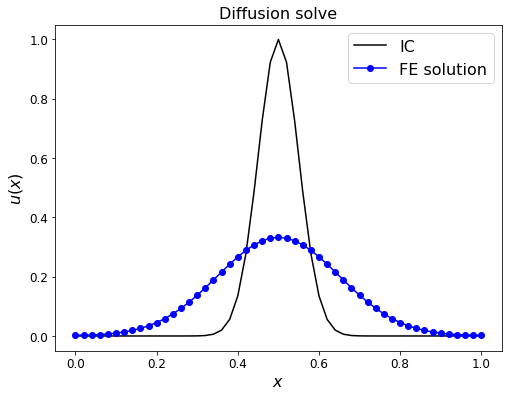

In [74]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Diffusion solve', fontsize=16)

ax1.plot(x_nodes, u_ic, 'k-', label='IC')
ax1.plot(x_nodes, u, 'bo-', label='FE solution')
ax1.legend(loc='best', fontsize=16);

A homework question asks you to consider the difference in solutions obtained with Dirichlet and Neumann conditions.